In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('poster')
sns.set_style("whitegrid")

In [39]:
import math

# function to print series of n elements that has specified mean and standard deviation d
def series(n, mean, d): 
    ret_lst = []
    # if S.D. is 0 then print all 
    # elements as 0. 
    if d == 0: 
        # print n 0's 
        for i in range(n): 
            ret_lst.append(0)
#             print("0", end = ' ') 
        return 1
          
    # if S.D. is even 
    if n % 2 == 0: 
        # print -SD, +SD, -SD, +SD 
        i = 1
        while i <= n: 
            ret_lst.append((math.pow(-1, i) * d))
#             print("%.5f"%((math.pow(-1, i) * d)), 
#                   end =' ') 
            i += 1
    else: 
        # if odd 
        # convert n to a float integer 
        m = n 
        r = (m / (m - 1)) 
        g = (float)(d * float(math.sqrt(r))) 
          
        # print one element to be 0 
        ret_lst.append(0)
#         print("0 ", end = ' ') 
          
        # print (n-1) elements as xi derived 
        # from the formula 
        i = 1
        while i < n: 
            ret_lst.append(math.pow(-1, i) * g)
#             print("%.5f"%(math.pow(-1, i) * g), 
#                   end = ' ') 
            i = i + 1
#     print("\n") 
    return [i + mean for i in ret_lst]

In [40]:
import json
import statistics 


with open('BaselineCacheFinalResults.txt') as json_file:
    data_dict = json.load(json_file)

mean_dev_dict = {}
    
for key in data_dict.keys():
    lst = data_dict[key] 
    print(key)
    print('Mean:')
    mean = float(sum(lst))/len(lst)
    print(mean)
    print('Standard Deviation:')
    res = statistics.pstdev(lst)
    print(res) 
    mean_dev_dict[key] = (mean, res)


MEASURE UNTRUSTED CREATE
Mean:
327.14
Standard Deviation:
267.01026272411326
MEASURE UNTRUSTED CREATE SSM
Mean:
3995.28
Standard Deviation:
342.573060236791
MEASURE TRUSTED CREATE
Mean:
4045.43
Standard Deviation:
398.5482218000728
MEASURE TRUSTED SEND
Mean:
342.33
Standard Deviation:
222.014551550118
MEASURE TRUSTED SEND 2
Mean:
18.3
Standard Deviation:
7.022107945624305
MEASURE UNTRUSTED SEND
Mean:
322.25
Standard Deviation:
194.58979289777767
MEASURE UNTRUSTED SEND 2
Mean:
9.75
Standard Deviation:
5.717298313014636


In [41]:
# azure_data = [
#     (3885, "Trusted (SSM)"),
#     (3504, "Trusted (SSM)"),
#     (3557, "Trusted (SSM)"),
#     (3768, "Trusted (SSM)"),
#     (3632, "Trusted (SSM)"),
#     (3572, "Untrusted (SSM)"),
#     (3660, "Untrusted (SSM)"),
#     (3792, "Untrusted (SSM)"),
#     (3852, "Untrusted (SSM)"),
#     (4033, "Untrusted (SSM)"),
#     (572, "Untrusted (USM)"),
#     (660, "Untrusted (USM)"),
#     (592, "Untrusted (USM)"),
#     (652, "Untrusted (USM)"),
#     (533, "Untrusted (USM)")
# ]
# azure_data = [
#     (5511, "Trusted (SSM)"),
#     (3357, "Trusted (SSM)"),
#     (3897, "Trusted (SSM)"),
#     (3513, "Trusted (SSM)"),
#     (3970, "Trusted (SSM)"),
#     (6288, "Untrusted (SSM)"),
#     (3524, "Untrusted (SSM)"),
#     (4010, "Untrusted (SSM)"),
#     (4631, "Untrusted (SSM)"),
#     (4361, "Untrusted (SSM)"),
#     (474, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (226, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (375, "Untrusted (USM)")
# ]
# azure_data = [
#     (4704, "Trusted (SSM)"),
#     (3888, "Trusted (SSM)"),
#     (3881, "Trusted (SSM)"),
#     (3417, "Trusted (SSM)"),
#     (3669, "Trusted (SSM)"),
#     (5854, "Untrusted (SSM)"),
#     (3760, "Untrusted (SSM)"),
#     (3620, "Untrusted (SSM)"),
#     (4743, "Untrusted (SSM)"),
#     (4642, "Untrusted (SSM)"),
#     (424, "Untrusted (USM)"),
#     (521, "Untrusted (USM)"),
#     (555, "Untrusted (USM)"),
#     (301, "Untrusted (USM)"),
#     (78, "Untrusted (USM)")
# ]
azure_data = [
    [(i, "Trusted (SSM)") for i in series(10, mean_dev_dict["MEASURE TRUSTED CREATE"][0], mean_dev_dict["MEASURE TRUSTED CREATE"][1])],
    [(i, "Untrusted (SSM)") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED CREATE SSM"][0], mean_dev_dict["MEASURE UNTRUSTED CREATE SSM"][1])],
    [(i, "Untrusted (USM)") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED CREATE"][0], mean_dev_dict["MEASURE UNTRUSTED CREATE"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Create Type']) 

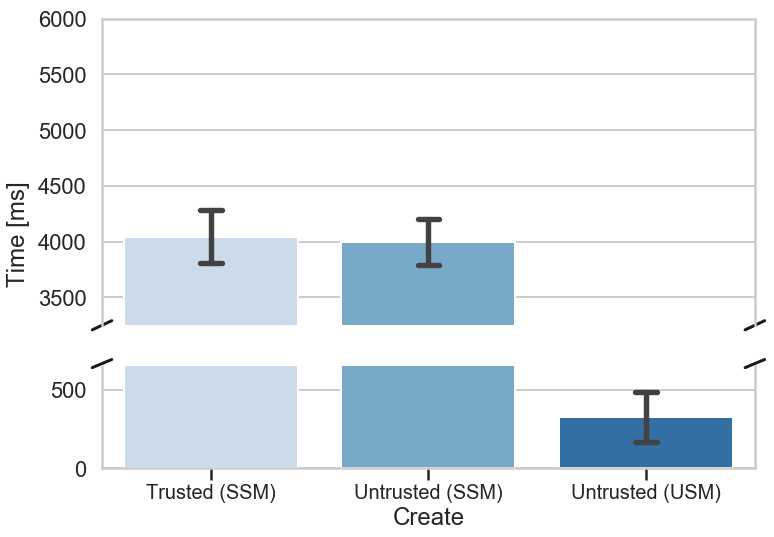

In [42]:
f,(ax,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# zoom-in / limit the view to different portions of the data
ax.set_ylim(3250, 6000)  # outliers only
ax2.set_ylim(0, 650)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax)
sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
ax2.set_ylabel('') 
ax2.tick_params(axis='x', labelsize=20)
ax.yaxis.set_label_coords(-.11,0.3)
ax2.set_xlabel('Create') 

# plt.savefig('PSecureCreateDataDiagram.png',dpi=500)
plt.show()


In [43]:
# azure_data = [
#     (322, "Trusted", "Initial"),
#     (162, "Trusted", "Initial"),
#     (277, "Trusted", "Initial"),
#     (86, "Trusted", "Initial"),
#     (237, "Trusted", "Initial"),
#     (336, "Untrusted", "Initial"),
#     (244, "Untrusted", "Initial"),
#     (255, "Untrusted", "Initial"),
#     (269, "Untrusted", "Initial"),
#     (238, "Untrusted", "Initial"),
#     (14, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (11, "Trusted", "Again"),
#     (15, "Trusted", "Again"),
#     (21, "Trusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (28, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (22, "Untrusted", "Again")
# ]
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]
# azure_data = [
#     (409, "Trusted", "Initial"),
#     (580, "Trusted", "Initial"),
#     (1056, "Trusted", "Initial"),
#     (488, "Trusted", "Initial"),
#     (90, "Trusted", "Initial"),
#     (176, "Untrusted", "Initial"),
#     (320, "Untrusted", "Initial"),
#     (972, "Untrusted", "Initial"),
#     (228, "Untrusted", "Initial"),
#     (259, "Untrusted", "Initial"),
#     (16, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (14, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (10, "Trusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (24, "Untrusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (21, "Untrusted", "Again"),
#     (19, "Untrusted", "Again")
# ]
azure_data = [
    [(i, "Trusted", "Initial") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND"][0], mean_dev_dict["MEASURE TRUSTED SEND"][1])],
    [(i, "Untrusted", "Initial") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND"][0], mean_dev_dict["MEASURE UNTRUSTED SEND"][1])],
    [(i, "Trusted", "Again") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND 2"][0], mean_dev_dict["MEASURE TRUSTED SEND 2"][1])],
    [(i, "Untrusted", "Again") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND 2"][0], mean_dev_dict["MEASURE UNTRUSTED SEND 2"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send Type', 'Phase']) 

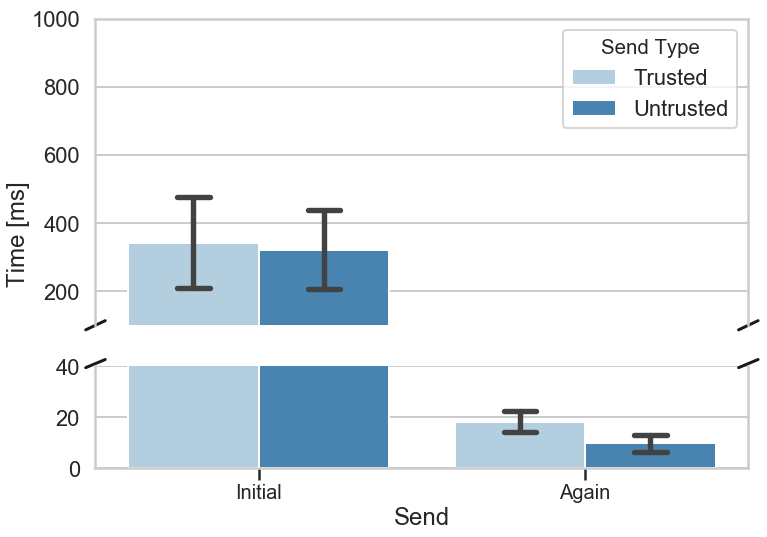

In [44]:
f,(ax,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# zoom-in / limit the view to different portions of the data
ax.set_ylim(100, 1000)  # outliers only
ax2.set_ylim(0, 40)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax)
sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
ax2.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax2.tick_params(axis='x', labelsize=20)
ax.yaxis.set_label_coords(-.1,0.3)
ax2.set_xlabel('Send') 
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)

plt.show()

In [45]:
# azure_data = [
#     (5511, "Trusted (SSM)"),
#     (3357, "Trusted (SSM)"),
#     (3897, "Trusted (SSM)"),
#     (3513, "Trusted (SSM)"),
#     (3970, "Trusted (SSM)"),
#     (6288, "Untrusted (SSM)"),
#     (3524, "Untrusted (SSM)"),
#     (4010, "Untrusted (SSM)"),
#     (4631, "Untrusted (SSM)"),
#     (4361, "Untrusted (SSM)"),
#     (474, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (226, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (375, "Untrusted (USM)")
# ]
azure_data = [
    [(i, "Trusted (SSM)") for i in series(10, mean_dev_dict["MEASURE TRUSTED CREATE"][0], mean_dev_dict["MEASURE TRUSTED CREATE"][1])],
    [(i, "Untrusted (SSM)") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED CREATE SSM"][0], mean_dev_dict["MEASURE UNTRUSTED CREATE SSM"][1])],
    [(i, "Untrusted (USM)") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED CREATE"][0], mean_dev_dict["MEASURE UNTRUSTED CREATE"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]

azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Create Type']) 

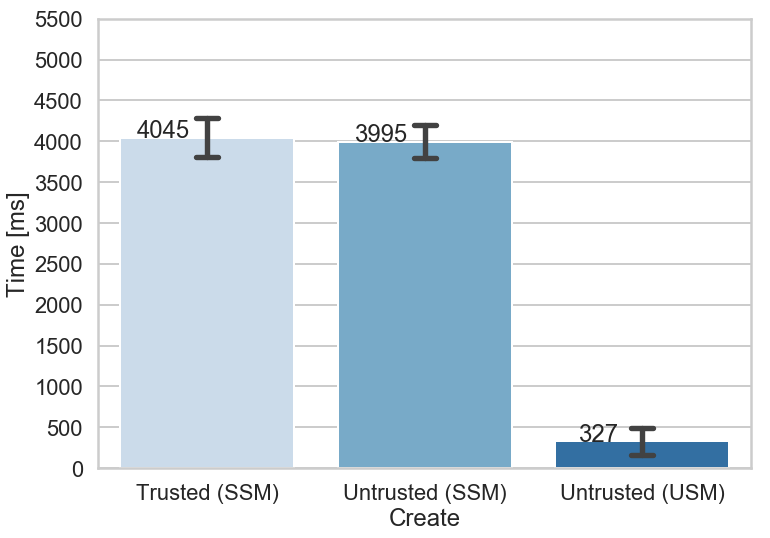

In [46]:

# # zoom-in / limit the view to different portions of the data
# ax.set_ylim(3250, 6000)  # outliers only
# ax2.set_ylim(0, 650)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

g = sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.11,0.3)
ax = plt.gca()
ax.set_xlabel('Create') 
plt.ylim(0, 5500)
plt.yticks(np.arange(0, 5501, 500))

# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)


plt.savefig('PSecureCreateDataDiagram.png',dpi=500)
# plt.show()


In [47]:
# azure_data = [
#     (322, "Trusted", "Initial"),
#     (162, "Trusted", "Initial"),
#     (277, "Trusted", "Initial"),
#     (86, "Trusted", "Initial"),
#     (237, "Trusted", "Initial"),
#     (336, "Untrusted", "Initial"),
#     (244, "Untrusted", "Initial"),
#     (255, "Untrusted", "Initial"),
#     (269, "Untrusted", "Initial"),
#     (238, "Untrusted", "Initial"),
#     (14, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (11, "Trusted", "Again"),
#     (15, "Trusted", "Again"),
#     (21, "Trusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (28, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (22, "Untrusted", "Again")
# ]
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]
# azure_data = [
#     (409, "Trusted", "Initial"),
#     (580, "Trusted", "Initial"),
#     (1056, "Trusted", "Initial"),
#     (488, "Trusted", "Initial"),
#     (90, "Trusted", "Initial"),
#     (176, "Untrusted", "Initial"),
#     (320, "Untrusted", "Initial"),
#     (972, "Untrusted", "Initial"),
#     (228, "Untrusted", "Initial"),
#     (259, "Untrusted", "Initial"),
#     (16, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (14, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (10, "Trusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (24, "Untrusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (21, "Untrusted", "Again"),
#     (19, "Untrusted", "Again")
# ]
azure_data = [
    [(i, "Trusted", "Initial") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND"][0], mean_dev_dict["MEASURE TRUSTED SEND"][1])],
    [(i, "Untrusted", "Initial") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND"][0], mean_dev_dict["MEASURE UNTRUSTED SEND"][1])],
    [(i, "Trusted", "Again") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND 2"][0], mean_dev_dict["MEASURE TRUSTED SEND 2"][1])],
    [(i, "Untrusted", "Again") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND 2"][0], mean_dev_dict["MEASURE UNTRUSTED SEND 2"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]

azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send Type', 'Phase']) 

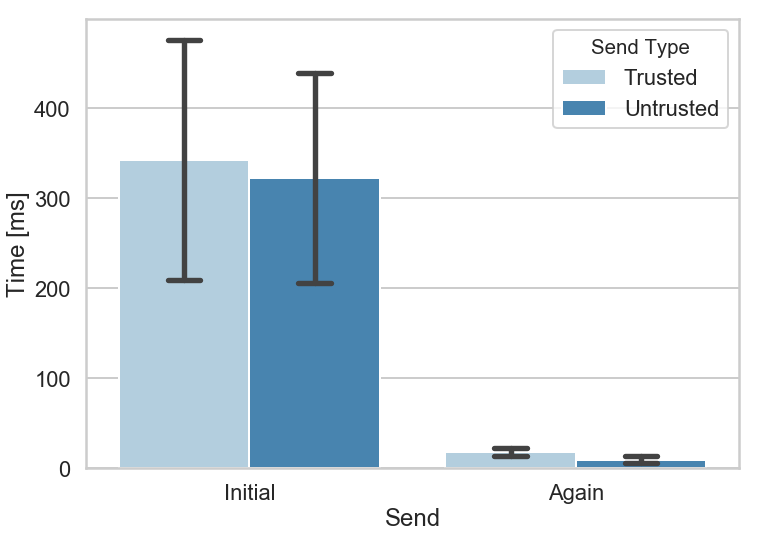

In [48]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
ax.set_xlabel('Send') 
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)

plt.show()

In [49]:
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial")
# ]

# azure_data = [
#     (409, "Trusted", "Initial"),
#     (580, "Trusted", "Initial"),
#     (1056, "Trusted", "Initial"),
#     (488, "Trusted", "Initial"),
#     (90, "Trusted", "Initial"),
#     (176, "Untrusted", "Initial"),
#     (320, "Untrusted", "Initial"),
#     (972, "Untrusted", "Initial"),
#     (228, "Untrusted", "Initial"),
#     (259, "Untrusted", "Initial")
# ]
azure_data = [
    [(i, "Trusted", "Initial") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND"][0], mean_dev_dict["MEASURE TRUSTED SEND"][1])],
    [(i, "Untrusted", "Initial") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND"][0], mean_dev_dict["MEASURE UNTRUSTED SEND"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send (Initial)', 'Phase']) 

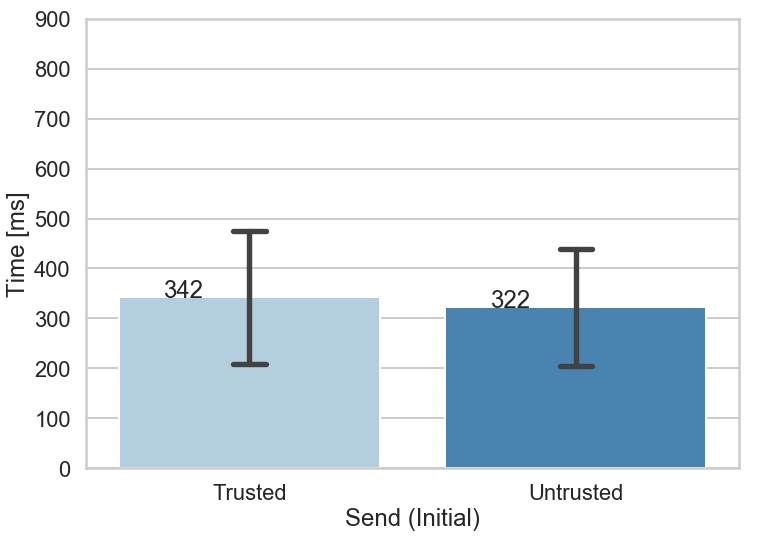

In [50]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Send (Initial)', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)
plt.ylim(0, 900)
plt.yticks(np.arange(0, 901, 100))
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)
plt.savefig('PSecureSendDataDiagram.png',dpi=500)

# plt.show()

In [51]:
# azure_data = [
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]

# azure_data = [
#     (16, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (14, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (10, "Trusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (24, "Untrusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (21, "Untrusted", "Again"),
#     (19, "Untrusted", "Again")
# ]
azure_data = [
    [(i, "Trusted", "Again") for i in series(10, mean_dev_dict["MEASURE TRUSTED SEND 2"][0], mean_dev_dict["MEASURE TRUSTED SEND 2"][1])],
    [(i, "Untrusted", "Again") for i in series(10, mean_dev_dict["MEASURE UNTRUSTED SEND 2"][0], mean_dev_dict["MEASURE UNTRUSTED SEND 2"][1])]
]
azure_data = [item for sublist in azure_data for item in sublist]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send (Again)', 'Phase']) 

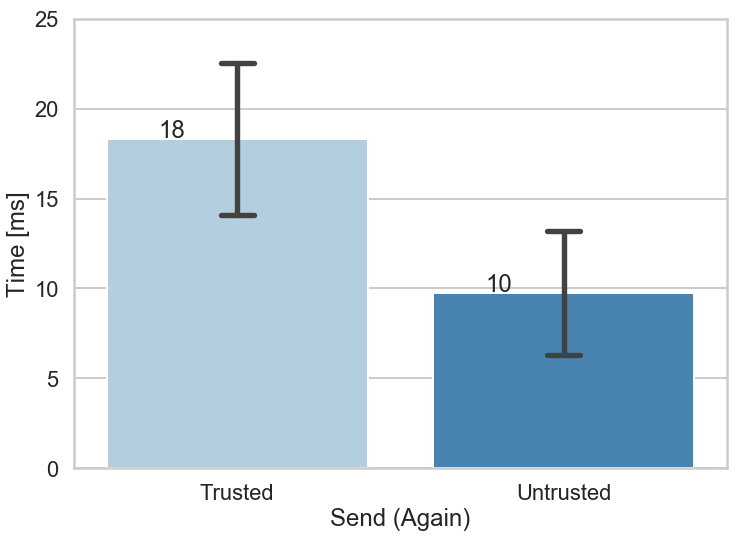

In [52]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Send (Again)', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)
plt.ylim(0, 25)
plt.yticks(np.arange(0, 26, 5))
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

plt.savefig('PSecureSendDataAgainDiagram.png',dpi=500)
# plt.show()